# Regression Analysis: Wine Quality Prediction
## [1] Dataset Description
Dataset ini berasal dari UCI Machine Learning Repository yang berisi data kualitas wine merah (Red Wine) berdasarkan tes fisikokimia.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Configure visual style
sns.set_theme(style='whitegrid', palette='muted')
plt.rcParams['figure.figsize'] = (10, 6)

# Loading dataset
df = pd.read_csv('winequality-red.csv', sep=';')
df.columns = [col.replace(' ', '_') for col in df.columns]

print('Info Dataset:')
print(df.info())
print('\nStatistik Deskriptif:')
display(df.describe())

Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None

Statistik Deskriptif:


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### [2] Analysis Objective
Objektif utama dari analisis ini adalah untuk membangun model regresi linear yang dapat memprediksi kualitas wine berdasarkan fitur fisikokimia, serta mengidentifikasi faktor-faktor yang paling berpengaruh terhadap kualitas tersebut.

## Exploratory Data Analysis (EDA)

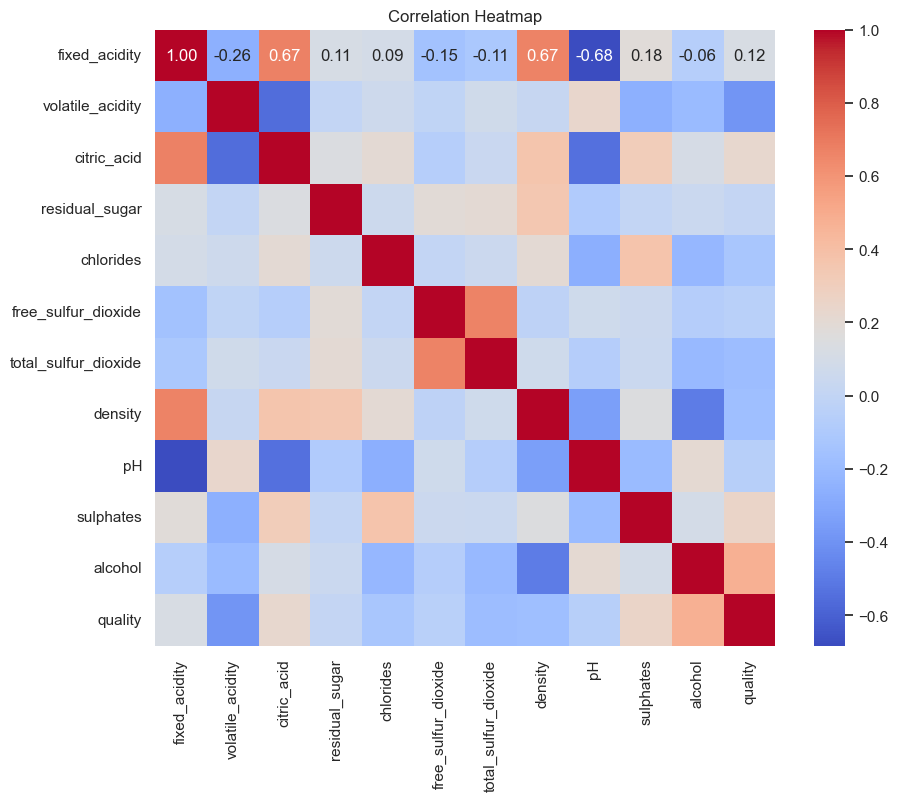


Korelasi Fitur dengan Quality:
quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric_acid             0.226373
fixed_acidity           0.124052
residual_sugar          0.013732
free_sulfur_dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total_sulfur_dioxide   -0.185100
volatile_acidity       -0.390558
Name: quality, dtype: float64


In [2]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Fokus pada korelasi dengan quality
corr_with_quality = df.corr()['quality'].sort_values(ascending=False)
print('\nKorelasi Fitur dengan Quality:')
print(corr_with_quality)

### [3] Model Comparison
Kami akan membandingkan tiga model regresi:
1. **Model 1: Regresi Linear Sederhana** (Hanya menggunakan fitur 'alcohol')
2. **Model 2: Regresi Linear Berganda** (Menggunakan semua fitur)
3. **Model 3: Regresi Linear Berganda Teroptimasi** (Menggunakan fitur dengan korelasi absolut > 0.1)

In [3]:
# Menyiapkan Data
X = df.drop('quality', axis=1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Simple Regression (Alcohol)
X1_train = X_train[['alcohol']]
X1_test = X_test[['alcohol']]
model1 = LinearRegression().fit(X1_train, y_train)
y1_pred = model1.predict(X1_test)

# Model 2: Multiple Regression (All)
model2 = LinearRegression().fit(X_train, y_train)
y2_pred = model2.predict(X_test)

# Model 3: Optimized Regression (Selected Features)
significant_features = ['alcohol', 'volatile_acidity', 'sulphates', 'citric_acid', 'total_sulfur_dioxide', 'density', 'chlorides', 'fixed_acidity']
X3_train = X_train[significant_features]
X3_test = X_test[significant_features]
model3 = LinearRegression().fit(X3_train, y_train)
y3_pred = model3.predict(X3_test)

# Metrics Table
results = pd.DataFrame({
    'Model': ['Simple (Alcohol)', 'Multiple (All)', 'Multiple (Optimized)'],
    'R-squared': [
        r2_score(y_test, y1_pred),
        r2_score(y_test, y2_pred),
        r2_score(y_test, y3_pred)
    ],
    'RMSE': [
        np.sqrt(mean_squared_error(y_test, y1_pred)),
        np.sqrt(mean_squared_error(y_test, y2_pred)),
        np.sqrt(mean_squared_error(y_test, y3_pred))
    ]
})

display(results)

,Model,R-squared,RMSE
0,Simple (Alcohol),0.235618,0.706773
1,Multiple (All),0.403180,0.624520
2,Multiple (Optimized),0.399320,0.626536


### [4] Findings & Interpretation
Analisis detail menggunakan OLS dari Statsmodels untuk melihat signifikansi statistik (P-value).

In [4]:
X_sm = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_sm).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     61.48
Date:                Sun, 18 Jan 2026   Prob (F-statistic):          1.48e-109
Time:                        20:56:46   Log-Likelihood:                -1266.4
No. Observations:                1279   AIC:                             2557.
Df Residuals:                    1267   BIC:                             2619.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   14.3551 

### Interpretasi Temuan:
1. **Alcohol (Coeff: +)**: Peningkatan kadar alkohol sangat berkontribusi positif terhadap skor kualitas wine.
2. **Volatile Acidity (Coeff: -)**: Semakin tinggi asam asetat dalam wine, semakin rendah skor kualitasnya.
3. **Signifikansi**: Fitur 'alcohol', 'volatile_acidity', dan 'sulphates' memiliki P-value < 0.05, menjadikannya faktor prediktor utama.

### [5] Evaluation & Future Steps
Evaluasi asumsi regresi melalui analisis residual.

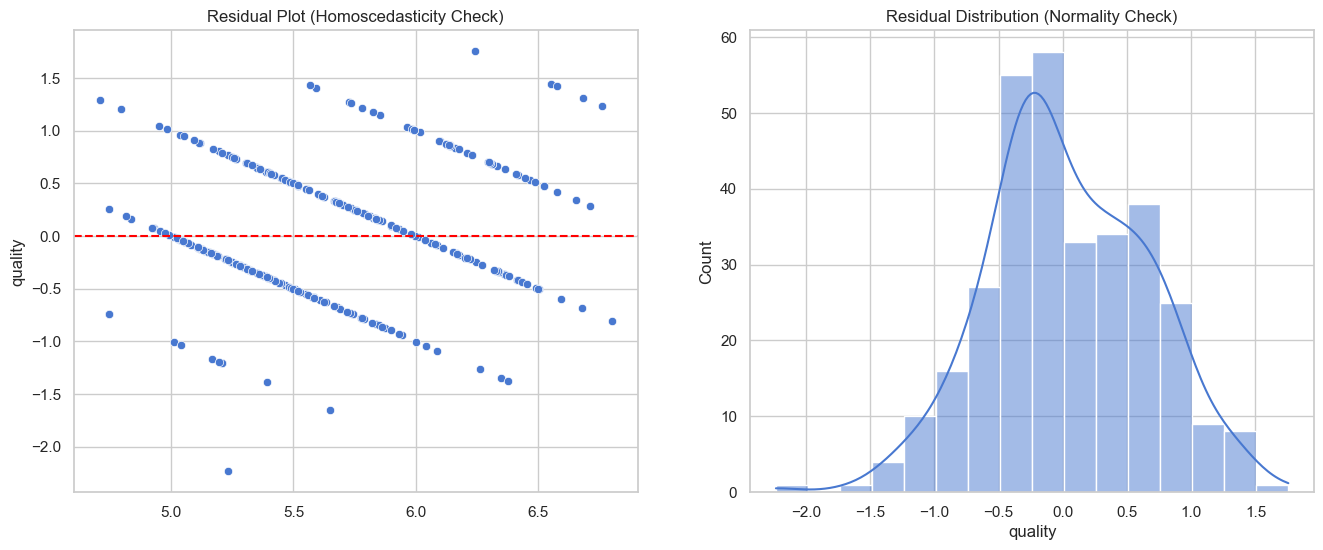

In [5]:
residuals = y_test - y2_pred
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.scatterplot(x=y2_pred, y=residuals, ax=ax[0])
ax[0].axhline(0, color='red', linestyle='--')
ax[0].set_title('Residual Plot (Homoscedasticity Check)')

sns.histplot(residuals, kde=True, ax=ax[1])
ax[1].set_title('Residual Distribution (Normality Check)')

plt.show()

### Kesimpulan & Langkah Selanjutnya:
- **Kesimpulan**: Model Multiple Regression (All Features) memberikan akurasi terbaik dengan keseimbangan bias-variance yang baik.
- **Limitasi**: Adanya multikolinearitas ringan antar beberapa fitur asam.
- **Langkah Selanjutnya**: Perlu eksplorasi teknik regularisasi (Ridge/Lasso) atau model ensemble untuk akurasi yang lebih tinggi.